
# Linear Regression



## Objectives

- Learn how use scatter plot to visualize relationship between two variables.
- Use seaborn to draw regression plot.
- Using Scikit-Learn to generate a Linear Regression model and perform prediction.
- Evaluate the model by looking at the mean squared error (MSE) value, R2 and adjusted R2 values.


## Introduction

The linear regression is one of the most common algorithms used to model the relationship among variables. It is routinely used to predict a numerical outcome from a related set of input predictors.

The simplest form of linear regression (aka Simple Linear Regression) involves two variables where one variable is used to predict another. The assumption is that the two variables have a linear relationship. This can be expressed as an equation below, where we wish to predict y given a known value of x.

$$y = β_0+β_1x$$

In the equation, the values of $β_0$ and $β_1$ is fixed and modelling  refers to the processing of determining the values of $β_0$ and $β_1$.

Theorectically, for a linear relationship (straight line in a cartesian plane), we will only need 2 sets of (x, y) values (2 points) but in practise, due to noise and errors, we will usually need more. The usefulness of the equation depends on how well the values of $β_0$ and $β_1$ are chosen. That is of course possible only if we have sufficient and quality data from which to derive the best $β$ values.

## Simple Linear Regression

In this practical, we will see how to use data to generate a linear regression models and then use the model for prediction. We will use a simple set of data for illustration purposes.

### Get the data

Read in the file 'mortgage_data.csv' in data folder as a pandas dataframe.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv(r'C:\Users\jaykr\OneDrive\Desktop\Poly\IT3301_AML\Week 1 Practical\mortgage_data.csv', index_col="Year")
print(df.head())

      Rates  Mortgage
Year                 
1988   10.3    183800
1989   10.3    163200
1990   10.1    174900
1991    9.3    213500
1992    8.4    202900


### Visualize the relationship

We can use the seaborn plotting library to show a regression plot of the data. The plot can help us see if there is some linear relationship between the two variables.

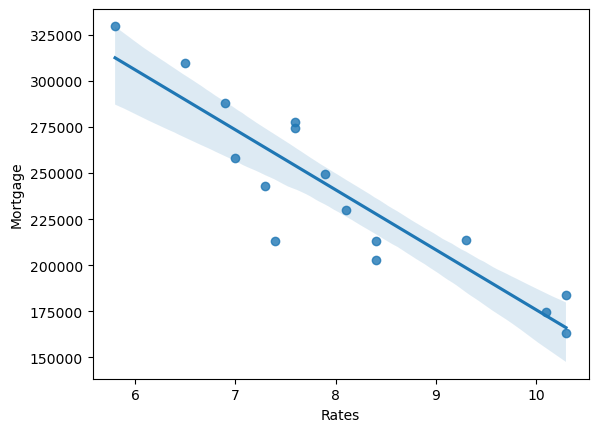

In [10]:
sns.regplot(x="Rates", y="Mortgage", data=df)
plt.show()

As can be seen from the figure, the two variables *Rates* and *Mortgages* are somewhat related to each other in a linear but inversely proportional manner. This implies that we should be able to get a good linear regression model. The band around the line shows the 95% confidence interval of the regression.

### Simple Linear Regression Modelling

We will now generate a scikit-learn linear regression model and subsequently use the model to predict a value. The Linear Regression algorithm is found under the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) module.

Create a LinearRegression model and train the model using data from the *Rates* and *Mortage* columns as follows.

**Note**

Scikit-learn model expects \$X$ (the features) to be of the shape (n_samples, n_features).  So our rates, which is a single dimensional array of shape (n_samples), need to be reshaped to (n_samples, 1).

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression

sklearn.set_config(display=None)

# reshape the numpy array
rates = df["Rates"].values.reshape(-1,1)
print(rates.shape)
mortgage = df['Mortgage'].values
print(mortgage.shape)

# Create LinearRegression
model = LinearRegression()

# train the model using the fit() function
model.fit(rates, mortgage)


(16, 1)
(16,)


LinearRegression()

We can also take a look at the equation generated by the ```fit()``` function. The coefficient ($β_1$) and intercept ($β_0$) can be retrieved using ```model.coef_``` and ```model.intercept_```.

In [12]:
#Print our the model coefficients and intercept there

print("Equation y={0:.2f}*x + {1:.2f}".format(model.coef_[0], model.intercept_))

Equation y=-32518.17*x + 501105.72


You should see the following results:

```
Equation y=-32518.17*x + 501105.72
```

This is the mathematical model that can be used for subsequent prediction using the `model.predict()` function.
To see how prediction works, we will input a value of 8.0 for the rates and see how well the model works. Based on the best-fit line we plotted earlier, we can guess that the predicted valued will be between 225k and 250k.

We can now use the model to predict mortage at a rate of 8% using the `model.predict()` function.

In [13]:
# Create a test value for rate of 8.0
test_rate = np.array([[8.0]])

# Use the predict function of the model to perform the prediction
predicted_mortgage = model.predict(test_rate)[0]
print(predicted_mortgage)

# Print out the predicted mortgage value
print("Predicted mortgage: {0:.2f}".format(predicted_mortgage))

240960.39678381893
Predicted mortgage: 240960.40


You should see the following output:

```
Predicted mortgage: 240960.40
```

As can be seen from the best-fit line, the value is approximately 240k which is inline with the prediction. You can also verify the value by substituting the value in the equation generated previously.

### Evaluating the Model

Very often, we will need to know how well our model works, especially when we need to compare different models and pick the best among them.

#### Mean Square Error (MSE)

The Mean Square Error value provides an indication of the performance of a model. Recall that we generate a model by minimizing the MSE of the training data, in other words, the lower the value of MSE, the smaller the prediction error.

In [14]:
from sklearn.metrics import mean_squared_error

# Calculates the MSE value
mse = mean_squared_error(mortgage, model.predict(rates))

# Print out the MSE value
print("MSE: {0:.2f}".format(mse))

MSE: 386904189.98


#### Coefficient of Determination ($R^2$) Value

$R^2$ value is an important and commonly used value to compare the predictive power of the models. ```Scikit-Learn``` package provides a ```r2_score()``` function under ```sklearn.metrics``` that can helps to calculate the $R^2$ value.

In [15]:
# import the r2_score function
from sklearn.metrics import r2_score

# Calculates the R sequared value
r2 = r2_score(mortgage, model.predict(rates))
# Print out the R sequared value
print("R Squared: {0:.2f}".format(r2))

R Squared: 0.82


Values of $R^2$ ranges from 0 (worst) to 1 (best). A score of 0.82 is very good performance for our model. This is not unexpected as the scatter plot already shown us that the variables are linearly related.

## Exercise: Multiple Linear Regression

In most real-world problems, we will need to deal with more than one input variables. In such cases, we can use a more generalized equation:

$$y=β_0+β_1 x_1+β_2 x_2+⋯+β_nx_n$$
Where $n$ is the number of input variables/predictors.

Let us now extend the use of scikit-learn regression model from single to three input variables. We will be using a dataset containing insurance claims for a single medical treatment performed in a hospital. In addition to the claim amount (CLAIM), the data file also contains patient age (AGE), length of hospital stay (LOS) and a severity of illness category (ASG). The ASG field is based on several health measures and higher scores indicate greater severity of the illness.

In this exercise, you are required to build a regression model that predicts the total claim amount for a patient based on his/her length of stay, severity of illness and patient age.
Use the codes in the previous section and the following task list as a guide:

1. Read the insurance_claim.csv file in the data folder
2. Create a LinearRegression model.
3. Train the model using the `fit()` function.
4. Use the model to predict and print out a predicted claim value.
5. Print out the regression equation.
6. Print out *MSE* and $R^2$ value.

The expected *MSE* and $R^2$ should be \\$4369.50 and 0.32 respectively.

In [17]:
# Enter your codes here
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\jaykr\OneDrive\Desktop\Poly\IT3301_AML\Week 1 Practical\insurance_claim.csv")
X = df[['ASG','AGE','LOS']].values
y = df['CLAIM'].values

model = LinearRegression()
model.fit(X, y)

test_data = test_data = np.array([
    [0, 26, 2]
])

predicted_claim = model.predict(test_data)[0]
print("Predicted claim is: {0:.2f} ".format(predicted_claim))
coeff = model.coef_
print("Equation: {0:.2f} * ASG + {1:.2f} * AGE + {2:.2f} * LOS + {3:.2f}".format(coeff[0], coeff[1], coeff[2], model.intercept_))
r2 = r2_score(y, model.predict(X))
print("R Squared: {0:.2f}".format(r2))


Predicted claim is: 4369.50 
Equation: 417.19 * ASG + -33.41 * AGE + 1105.65 * LOS + 3026.75
R Squared: 0.32



<details>
    <summary>Click here for answer</summary>

```

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/insurance_claim.csv")
X = df[['ASG','AGE','LOS']].values
y = df['CLAIM'].values

model = LinearRegression()
model.fit(X, y)

test_data = test_data = np.array([
    [0, 26, 2]
])

predicted_claim = model.predict(test_data)[0]
print("Predicted claim is: {0:.2f} ".format(predicted_claim))
coeff = model.coef_
print("Equation: {0:.2f} * ASG + {1:.2f} * AGE + {2:.2f} * LOS + {3:.2f}".format(coeff[0], coeff[1], coeff[2], model.intercept_))
r2 = r2_score(y, model.predict(X))
print("R Squared: {0:.2f}".format(r2))

```

</details>

#### Adjusted R2

In some cases, $R^2$ does not provide the best evaluation measurement of the performance of our model. This is because $R^2$ measurement does not penalize the inclusion of useless input variables. In other words, the more input variables used in the model, the higher the score. This is not desireable as including input variables that does not contributes significantly to quality of the prediction adds costs for data collection as well as processing time.

It is thus useful to use Adjusted $R^2$ defined as:

$$Adjusted\, R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$

Where $n$ = number of data samples in the data and $p$ = number of input variables
As can be seen from the equation, as p increases, adjusted $R^2$ value decreases (the larger the value of $R^2$, the better the model).

In [18]:
# Try it out, enter your codes here to calculate the Adjusted R2 value

X = df[['ASG','AGE','LOS']].values
y = df['CLAIM'].values
r2 = r2_score(y, model.predict(X))

num_variables = X.shape[1]
num_samples = X.shape[0]

adjusted_r2 = 1 - ((1-r2) * (num_samples-1)) / (num_samples-num_variables-1)
print(adjusted_r2)

0.31061241239798565


<details><summary>Click here for answer</summary>

```python

X = df[['ASG','AGE','LOS']].values
y = df['CLAIM'].values
r2 = r2_score(y, model.predict(X))

num_variables = X.shape[1]
num_samples = X.shape[0]

adjusted_r2 = 1 - ((1-r2) * (num_samples-1)) / (num_samples-num_variables-1)
print(adjusted_r2)

```
</details>

If you run the codes, you should see that $R^2$ value is 0.32 while adjusted $R^2$ value is 0.31, showing that adjusted $R^2$ value is less as it takes into account the number of input variables used. Note also that $R^2$ and adjusted $R^2$ values will be very similar if the number of data samples is much larger then the number of input variables.